# PCA for Dimensionality Reduction

In this notebook we explore Principal Component Analysis (PCA) and how it can be used to interpret high dimensional datasets in lower dimensions. 
To do so, we review concepts from linear algebra to get a fuller understanding of what's going on and why PCA works.
We then walk through running PCA on a small dataset. 

We first review how PCA is defined, what exactly the principal components are, and how PCA allows us to reduce the dimensionality of our dataset in a *good* way. 
We then see how we can use PCA in Python by analyzing a [diabetes dataset](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html) provided by NCSU
and what the principal components are. 


Suppose we have a dataset of $n$ samples where each sample is described by $m$ real valued attributes. 
For the purpose of dimensionality reduction, our goal will be to find a matrix $Y$ of size $n \times d$ where $d << m $ and $Y$ approximates $X$ 
(that is, $Y$ still captures the underlying properties of the dataset.)
In this way, the $d$ remaining attributes would be the componenets of $X$ that capture the most relevant information of our dataset, or are its **principal components**.

Before we see how we can compute these componenets, let's consider some scenarios where such a reduction can occur. 
One possibility is a set of attributes within the dataset are the same for each sample - there is no information that these attributes have that allow us to distinguish one sample from another. 
Therefore we could easily remove this set of attributes shrinking the size of $X$.
Typically this is not the case however and there is some variability between sample values for a particular attribute. 
An attribute that has less variability amongst its values may contain less information than an attribute with high variability and therefore could be removed from $X$ to generate $Y$.

Another possiblity is there are some dependency between attributes within the data. 
For example, if we find $x_i = x_j + x_k$ for all samples and attributes $i,j,k$ then attribute $i$ is dependent on $j$ and $k$ and could be removed.
In this way, there is some **correlation** between our attributes, and while a perfect correlation may not always exist due to noisy measurements, we may be able to drop many attributes without losing too much information.

## Principal Components of a Dataset 

Suppose we have a dataset of $n$ samples. Each sample is measured by one of $m$ attributes.
We can interpret this as a matrix $X$ of size $n \times m$  where each row vector corresponds to a sample. 
For the purpose of dimensionality reduction, we would like to find a matrix $Y$ of size $n \times d$ where $d << m $ and $Y$ approximates $X$ 
(that is, $Y$ still captures the underlying properties of the dataset.)
In this way, the $d$ remaining attributes would be the componenets of $X$ that capture the most relevant information, or are the **principal components** of $X$.

Before we see how we can compute these componenets, let's consider some scenarios where such a reduction can occur. 
One possibility is a set of attributes within the dataset are the same for each sample - there is no information that these attributes have that allow us to distinguish one sample from another. 
Therefore we could easily remove this set of attributes shrinking the size of $X$.
Typically this is not the case however and there is some variability between sample values for a particular attribute. 
An attribute that has less variability amongst its values may contain less information than an attribute with high variability and therefore could be removed from $X$ to generate $Y$.

Another possiblity is there are some dependency between attributes within the data. 
For example, if we find $x_i = x_j + x_k$ for all samples and attributes $i,j,k$ then attribute $i$ is dependent on $j$ and $k$ and could be removed.


## Linear Algebra Recap: SVD, Eigenpairs, etc.

To make the steps to PCA clearer, we first review some concepts from linear algebra. 
We do not aim to prove any statements here but encourage the reader to dive deeper into them using resources like
Gilber String's introduction to linear algebra books or Brunton and Kutz's [Data Drive Science & Engineering](https://databookuw.com/databook.pdf) book.

### Means and Variance

Given $n$ samples and $m$ attribute vectors, we can compute what the **mean value** is for each attribute is, and compare each value to how it differs from the mean. 
We can then define what the variance for each attribute is. 
However we can further extend this by considering what the variance is between any two attributes. 
These are combined into a single $m \times m$ matrix called the **covariance** matrix. 

If our dataset is mean centered (the mean rows of $X$ are 0) it follows that the covariance matrix of $X$ is
$$
C = \frac{1}{n-1}X^TX
$$

### Singular Value Decomposition (SVD)

The SVD of a matrix $X$ is a decomposition of $X$ into 3 special matrices:
$$
X = U \Sigma V^T
$$
where 
- $U$ is the left singular value vectors, a $n \times n$ matrix,
- $\Sigma$ is a real, non-negative valued diagonal matrix (zeros off the main diagonal - contains 0s below if $n \geq m$), a $m \times n$ matrix, and
- $V$ is the right singular value vectors, a $m \times m$ matrix.

There are other notable properties are:
1. The order of $u_1, u_2, ..., u_n$ is such that $u_1$ describes the variance in the cols of $X$ more than $u_2, ..., u_n$, $u_2$ describes the variance in the cols of $X$ more than $u_3, ...$, and so on.
2. $U$ and $V$ are unitary matrices such that $U^TU = V^TV = I$ (the identity matrix.)
3. The entries of $\Sigma$ are $\sigma_1, \sigma_2, ...$ and are ordered such that $\sigma_1 \geq \sigma_2 \geq ... \geq 0$.
4. Columns within $U$ and $V$ are orthonormal.

We do not concern ourselves with how the decomposition can be calculated (Python's `numpy` package provides our implementation) only that such a decomposition exists. 

### Eigenvalues and Eigenvectors

For a matrix $A$ of size $n \times n$, the vector $v$ and value $\lambda$ are called eigenvector and eigenvalue if
$$
Av = \lambda v
$$
A key property of eigenvectors are vectors which are only changes by a scalar value whenever a linear transformation is applied to them.

If we stack all the eigenvectors together into a $n \times n$ matrix $V$ we have
$$
AV = V \Lambda
$$
where $\Lambda$ is a diagonal matrix with matrix filled with eigenvalues.

## SVD and PCA

We now see how the SVD of our dataset relates to its principal components. 
First we mean center our dataset. We then compute $X^TX$ using the SVD of $X$
$$\begin{aligned}
X^TX &= (U \Sigma V^T)^T (U \Sigma V^T) \\
&= V \Sigma^T U^T U \Sigma V^T \\
&= V \Sigma^T \Sigma V^T \\
&= V D V^T
\end{aligned}$$

where $D = \Sigma^T \Sigma$ is a diagonal with squares of singular values and making note of $U$ being a unitary matrix. 

Now we compute $(X^TX)V$ using the above

$$\begin{aligned}
(X^TX)V &= (V D V^T) V \\
(X^TX)V &= V D
\end{aligned}$$
as $V$ is a unitary matrix. 

We now observe that $V$ is the eigenvectors of, not our dataset $X$, but $X^TX$ and that $D$ contains our eigenvalues (which are $\sigma_1^2, \sigma_2^2, ...$).
But since our dataset is mean centered, we know that $X^TX = (n-1)C$ our dataset's covariance matrix scaled by $n-1$. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


%matplotlib widget

In [2]:

n = 25
x1 = np.random.normal(3, 1, n)
x2 = np.random.normal(1, 2, n)
x3 = 3*x1 - x2 + np.random.normal(0, 0.5, n)
X = np.array([x1, x2, x3]).transpose()
X

array([[ 3.13840647,  0.77262008,  8.64378506],
       [ 2.98861809, -0.35152379,  8.90079275],
       [ 4.38989006, -0.16940266, 13.20444132],
       [ 4.38467618, -1.4728562 , 14.3766411 ],
       [ 4.3345991 ,  4.75851418,  8.50940769],
       [ 3.90023899,  1.71395264, 10.77923094],
       [ 4.73904   ,  3.44274887, 10.7154488 ],
       [ 3.2654713 ,  1.07694363,  8.33357466],
       [ 3.21608273, -0.2052211 , 10.71498771],
       [ 5.26727929, -0.47033741, 16.86991373],
       [ 2.78797344,  5.0686693 ,  3.79131053],
       [ 1.50958081,  0.42823911,  3.69397145],
       [ 2.65645958,  1.48720873,  7.14985802],
       [ 2.75044724,  0.26494367,  7.81180837],
       [ 2.78324541,  2.3149117 ,  6.30207954],
       [ 2.84325904,  1.00486148,  7.37984755],
       [ 3.89225075,  0.21810644, 12.08075368],
       [ 4.07255857,  1.24726425, 11.30179987],
       [ 2.53650186,  2.03772808,  5.15540517],
       [ 2.29692518,  5.22129898,  1.15438235],
       [ 3.9481298 ,  0.68855192, 11.828

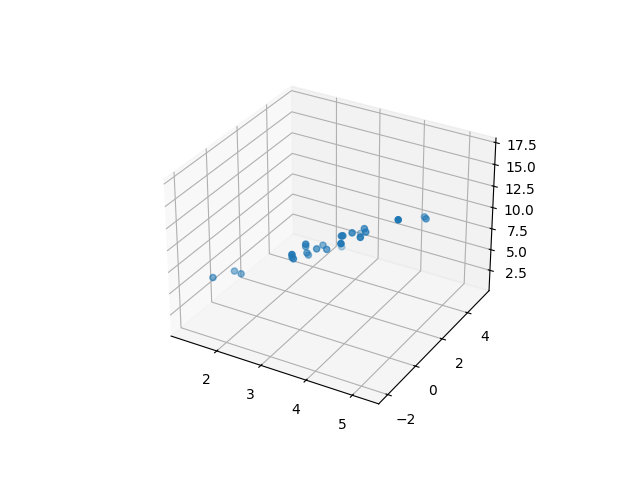

In [4]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],X[:,2])
plt.show()

In [8]:
# PCA
# 1. normalize data
X = (X - X.mean(axis=0)) / X.std(axis=0)
X

array([[-0.1151217 , -0.18588461, -0.04055357],
       [-0.26180958, -0.79597078,  0.02728405],
       [ 1.11045726, -0.69713149,  1.16323943],
       [ 1.1053513 , -1.40453113,  1.47264356],
       [ 1.05631077,  1.97730721, -0.07602271],
       [ 0.63094155,  0.32498768,  0.52310101],
       [ 1.45238009,  1.26322583,  0.50626561],
       [ 0.009313  , -0.02072463, -0.12243413],
       [-0.03905326, -0.71657058,  0.5061439 ],
       [ 1.96968528, -0.86045234,  2.13074712],
       [-0.45830106,  2.14563206, -1.3213725 ],
       [-1.71023206, -0.37278424, -1.34706531],
       [-0.5870927 ,  0.20193109, -0.43487816],
       [-0.4950505 , -0.4614066 , -0.26015524],
       [-0.46293122,  0.65113527, -0.65865073],
       [-0.40415983, -0.05984446, -0.37417203],
       [ 0.62311865, -0.48682572,  0.86664016],
       [ 0.79969425,  0.07171038,  0.66103397],
       [-0.70456739,  0.50070444, -0.96131739],
       [-0.93918504,  2.22846599, -2.01739418],
       [ 0.67784105, -0.2315094 ,  0.800

In [9]:
# 2. Calculate covariance matrix
C = np.cov(X, ddof=1, rowvar=False)
C

array([[ 1.04166667, -0.05102738,  0.90398709],
       [-0.05102738,  1.04166667, -0.54920608],
       [ 0.90398709, -0.54920608,  1.04166667]])

In [12]:
# 3. Compute eigenvectors and eigenvalues on convariance matrix
eigenvalues, eigenvectors = np.linalg.eig(C)
print("Eigenvectors:", eigenvectors)
print("Eigenvalues:", eigenvalues)

Eigenvectors: [[-0.6030067   0.60643999  0.51827932]
 [ 0.38380849 -0.34900154  0.85492044]
 [-0.69933823 -0.71444276  0.02230655]]
Eigenvalues: [2.12254599 0.00605159 0.99640242]


In [15]:
# 4. Sort principal components
ordered = np.argsort(eigenvalues)[::-1] # reverse to have highest to lowest
sorted_eigenvalues = eigenvalues[ordered]
sorted_eigenvectors = eigenvectors[ordered]
print("Eigenvectors:", sorted_eigenvectors)
print("Eigenvalues:", sorted_eigenvalues)

Eigenvectors: [[-0.6030067   0.60643999  0.51827932]
 [-0.69933823 -0.71444276  0.02230655]
 [ 0.38380849 -0.34900154  0.85492044]]
Eigenvalues: [2.12254599 0.99640242 0.00605159]


In [16]:
# 5. explained variance
sorted_eigenvalues / np.sum(sorted_eigenvalues)

array([0.67921472, 0.31884877, 0.00193651])

In [20]:
k = 2
R = np.matmul(X, sorted_eigenvectors[:, :k])

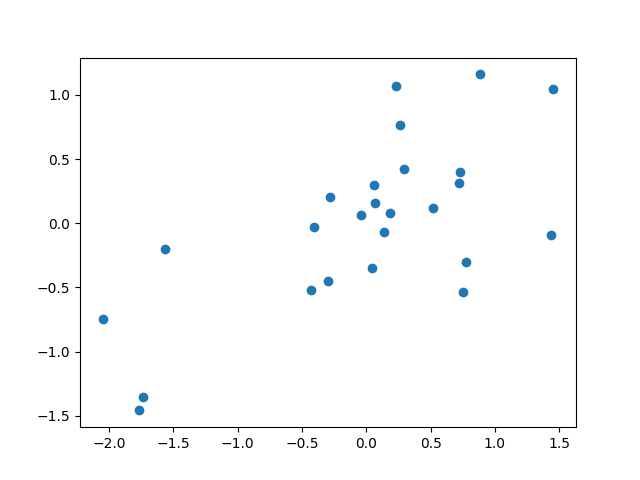

In [22]:
fig2 = plt.figure()
ax = fig2.add_subplot(111)
ax.scatter(R[:,0], R[:,1])
plt.show()